In [1]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [2]:
#引入TA-Lib库
import talib as ta

In [3]:
#获取交易数据用于示例分析
import tushare as ts
def get_data(code,start='2015-01-01'):
    df=ts.get_k_data(code,start)
    df.index=pd.to_datetime(df.date)
    df=df.sort_index()
    return df

In [4]:
#获取上证指数收盘价、最高、最低价格
df=get_data('sh')[['open','close','high','low']]
df.head()

,open,close,high,low
date,,,,
2015-01-05,3258.63,3350.52,3369.28,3253.88
2015-01-06,3330.80,3351.45,3394.22,3303.18
2015-01-07,3326.65,3373.95,3374.90,3312.21
2015-01-08,3371.96,3293.46,3381.57,3285.09
2015-01-09,3276.97,3285.41,3404.83,3267.51


### Price Transform 价格转换

In [93]:
#开盘价，最高价，最低价，收盘价的均值
df['average']=ta.AVGPRICE(df.open,df.high,df.low,df.close)
#最高价，最低价的均值
df['median']=ta.MEDPRICE(df.high,df.low)
#最高价，最低价，收盘价的均值
df['typical']=ta.TYPPRICE(df.high,df.low,df.close)
#最高价，最低价，收盘价的加权
df['weight']=ta.WCLPRICE(df.high,df.low,df.close)
df.head()

,open,close,high,low,average,median,typical,weight
date,,,,,,,,
2015-01-05,3258.63,3350.52,3369.28,3253.88,3308.0775,3311.580,3324.560000,3331.0500
2015-01-06,3330.80,3351.45,3394.22,3303.18,3344.9125,3348.700,3349.616667,3350.0750
2015-01-07,3326.65,3373.95,3374.90,3312.21,3346.9275,3343.555,3353.686667,3358.7525
2015-01-08,3371.96,3293.46,3381.57,3285.09,3333.0200,3333.330,3320.040000,3313.3950
2015-01-09,3276.97,3285.41,3404.83,3267.51,3308.6800,3336.170,3319.250000,3310.7900


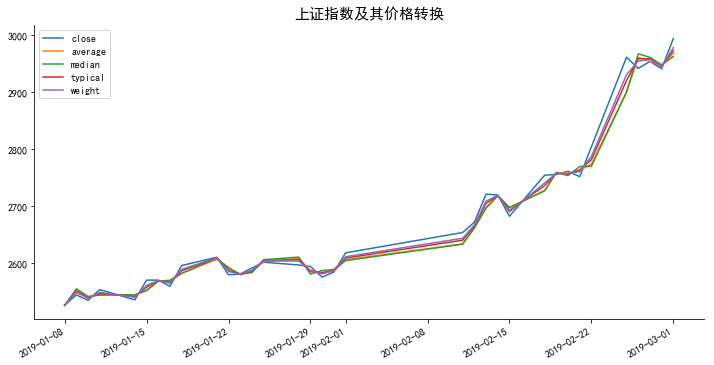

In [107]:
df.loc['2019-01-08':,['close','average','median','typical','weight']].plot(figsize=(12,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数及其价格转换',fontsize=15)
plt.xlabel('')
plt.show()

### Cycle Indicator Functions周期指标函数

In [110]:
df=get_data('sh')[['open','close','high','low']]
df['dcperiod']=ta.HT_DCPERIOD(df.close)
df['dcphase']=ta.HT_DCPHASE(df.close)
df['inhpase'],df['quadrature']=ta.HT_PHASOR(df.close)
df['sine'],df['leadsine']=sine, leadsine = ta.HT_SINE(df.close)
df['trendmode']=ta.HT_TRENDMODE(df.close)
df.tail()

,open,close,high,low,dcperiod,dcphase,inhpase,quadrature,sine,leadsine,trendmode
date,,,,,,,,,,,
2019-02-25,2838.39,2961.28,2961.80,2838.39,27.163520,159.841043,54.272101,17.053331,0.344626,-0.420102,1
2019-02-26,2969.10,2941.52,2995.68,2938.62,26.121407,158.691623,80.162728,0.800324,0.363387,-0.401814,1
2019-02-27,2939.93,2953.82,2997.49,2924.64,25.476232,159.406324,61.468943,5.158592,0.351738,-0.413205,1
2019-02-28,2950.05,2940.95,2965.30,2930.20,25.696272,159.937199,64.608268,56.088474,0.343050,-0.421625,1
2019-03-01,2954.40,2994.00,2994.00,2930.83,26.706419,160.543443,75.916101,181.937700,0.333092,-0.431195,1


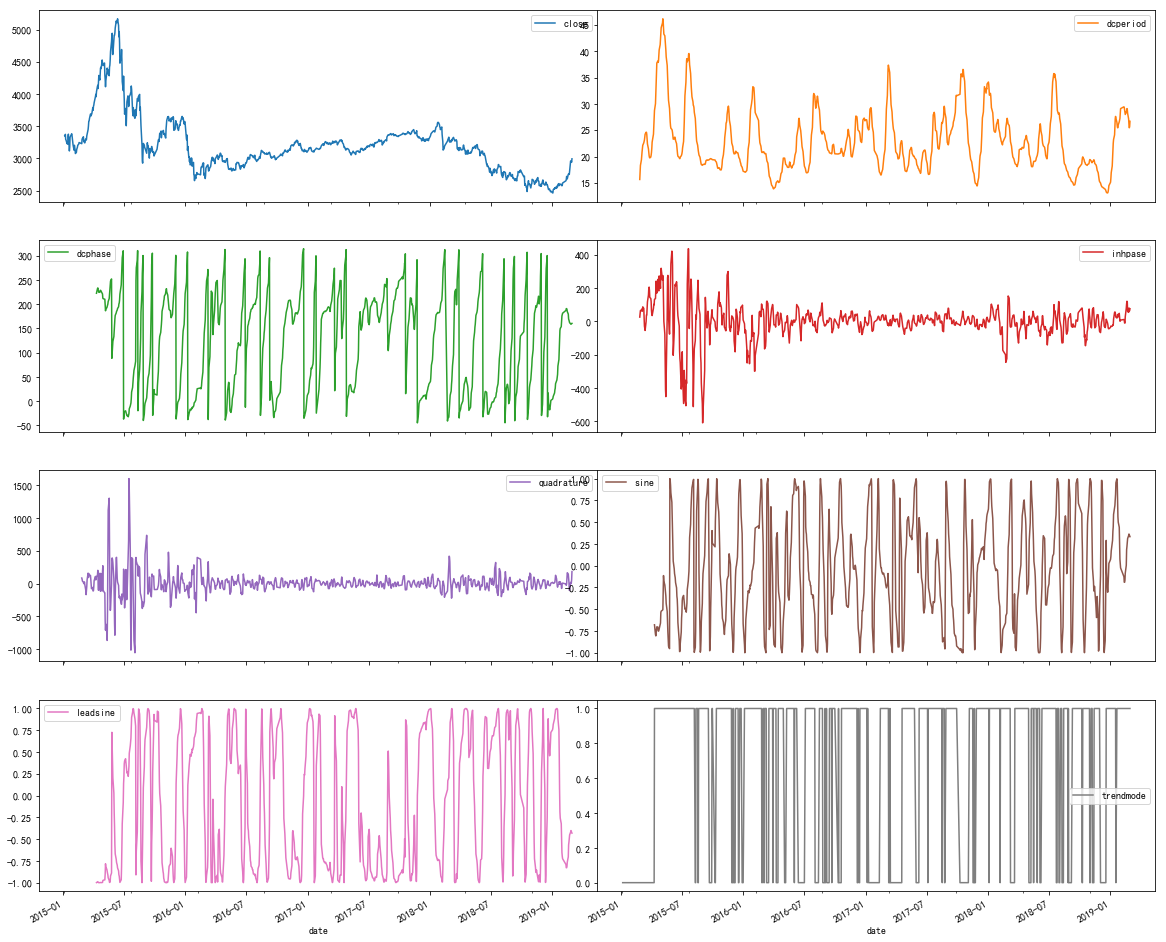

In [115]:
#将上述函数计算得到的结果进行可视化
df[['close','dcperiod','dcphase','inhpase','quadrature','sine','leadsine','trendmode']].plot(figsize=(20,18),
       subplots = True,layout=(4, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)

### Volatility Indicator Functions 波动率指标函数

In [182]:
df=get_data('sh')[['open','close','high','low']]
df['atr']=ta.ATR(df.high, df.low, df.close, timeperiod=14)
df['natr']=ta.NATR(df.high, df.low, df.close, timeperiod=14)
df['trange']=ta.TRANGE(df.high, df.low, df.close)
df.tail()

,open,close,high,low,atr,natr,trange
date,,,,,,,
2019-02-25,2838.39,2961.28,2961.80,2838.39,47.837298,1.615426,157.57
2019-02-26,2969.10,2941.52,2995.68,2938.62,48.496062,1.648674,57.06
2019-02-27,2939.93,2953.82,2997.49,2924.64,50.235629,1.700700,72.85
2019-02-28,2950.05,2940.95,2965.30,2930.20,49.154513,1.671382,35.10
2019-03-01,2954.40,2994.00,2994.00,2930.83,50.155619,1.675204,63.17


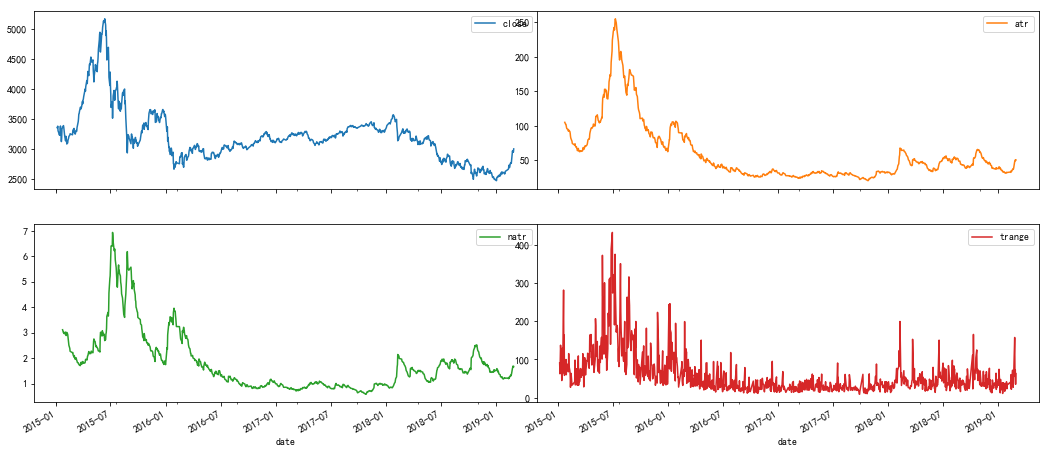

In [183]:
#将上述函数计算得到的结果进行可视化
df[['close','atr','natr','trange']].plot(figsize=(18,8),
       subplots = True,layout=(2, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)

### Math Operator Functions数学运算

In [48]:
df=get_data('sh')[['open','close','high','low']]
#最高价与最低价之和
df['add']=ta.ADD(df.high,df.low)
#最高价与最低价之差
df['sub']=ta.SUB(df.high,df.low)
#最高价与最低价之乘
df['mult']=ta.MULT(df.high,df.low)
#最高价与最低价之除
df['div']=ta.DIV(df.high,df.low)
#收盘价的每30日移动求和
df['sum']=ta.SUM(df.close, timeperiod=30)
#收盘价的每30日内的最大最小值
df['min'], df['max'] = ta.MINMAX(df.close, timeperiod=30)
#收盘价的每30日内的最大最小值对应的索引值（第N行）
df['minidx'], df['maxidx'] = ta.MINMAXINDEX(df.close, timeperiod=30)
df.tail()

,open,close,high,low,add,sub,mult,div,sum,min,max,minidx,maxidx
date,,,,,,,,,,,,,
2019-02-25,2838.39,2961.28,2961.80,2838.39,5800.19,123.41,8.406744e+06,1.043479,79163.63,2526.46,2961.28,979,1008
2019-02-26,2969.10,2941.52,2995.68,2938.62,5934.30,57.06,8.803165e+06,1.019417,79578.69,2535.10,2961.28,981,1008
2019-02-27,2939.93,2953.82,2997.49,2924.64,5922.13,72.85,8.766579e+06,1.024909,79988.17,2535.10,2961.28,981,1008
2019-02-28,2950.05,2940.95,2965.30,2930.20,5895.50,35.10,8.688922e+06,1.011979,80394.02,2535.77,2961.28,983,1008
2019-03-01,2954.40,2994.00,2994.00,2930.83,5924.83,63.17,8.774905e+06,1.021554,80834.19,2535.77,2994.00,983,1012


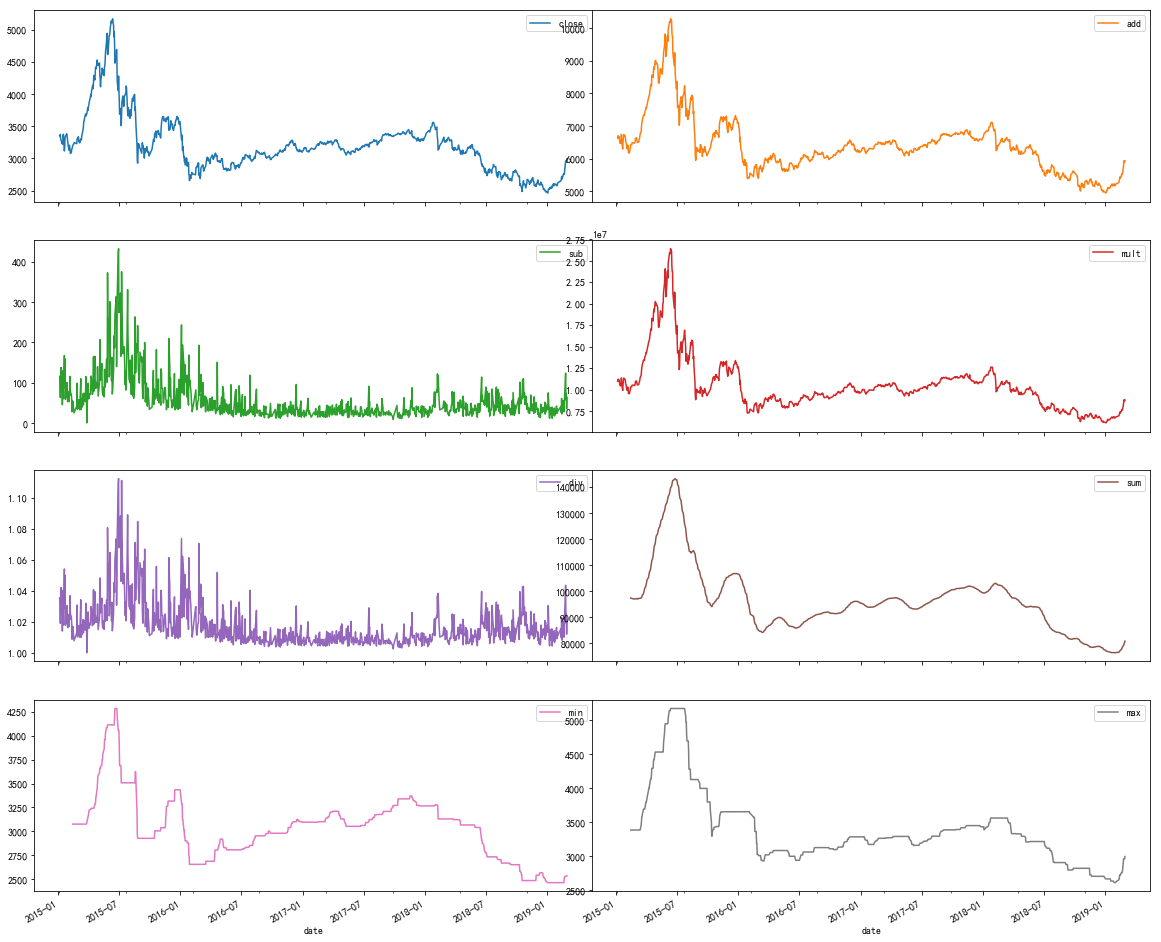

In [82]:
#将上述函数计算得到的结果进行可视化
df[['close','add','sub','mult','div','sum','min','max']].plot(figsize=(20,18),
       subplots = True,
       layout=(4, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)

### Statistic Functions统计学函数

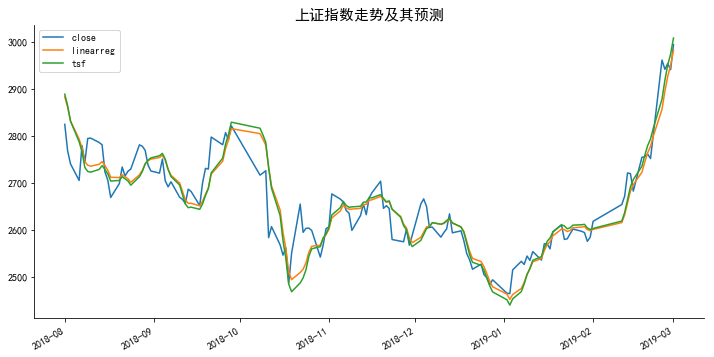

In [142]:
df=get_data('sh')[['open','close','high','low']]
#收盘价对时间t的线性回归预测值
df['linearreg']=ta.LINEARREG(df.close, timeperiod=14)
#时间序列预测值
df['tsf']=ta.TSF(df.close, timeperiod=14)
#画图
df.loc['2018-08-01':,['close','linearreg','tsf']].plot(figsize=(12,6))
ax = plt.gca()  
ax.spines['right'].set_color('none') 
ax.spines['top'].set_color('none')   
plt.title('上证指数走势及其预测',fontsize=15)
plt.xlabel('')
plt.show()

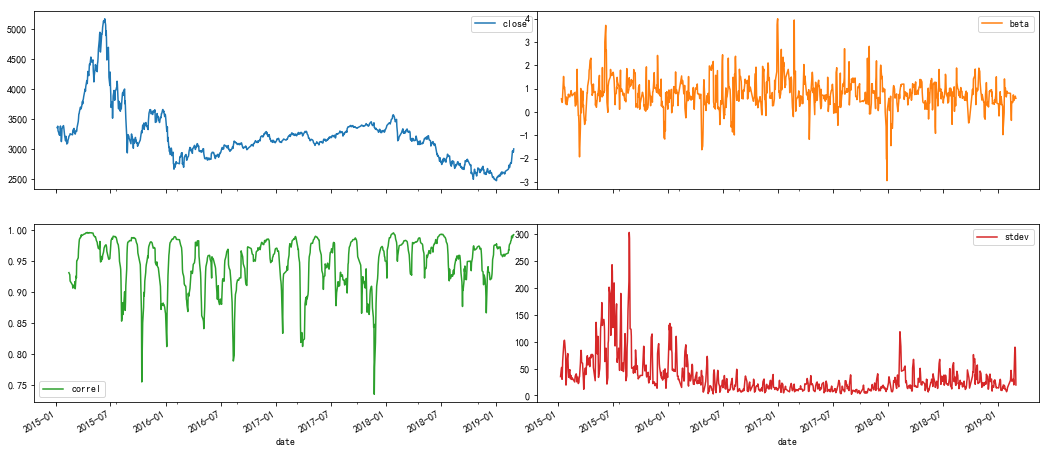

In [180]:
df['beta']=ta.BETA(df.high,df.low,timeperiod=5)
df['correl']=ta.CORREL(df.high, df.low, timeperiod=30)
df['stdev']=ta.STDDEV(df.close, timeperiod=5, nbdev=1)
#将上述函数计算得到的结果进行可视化
df[['close','beta','correl','stdev']].plot(figsize=(18,8),
       subplots = True,layout=(2, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)

### Math Transform Functions数学转换函数

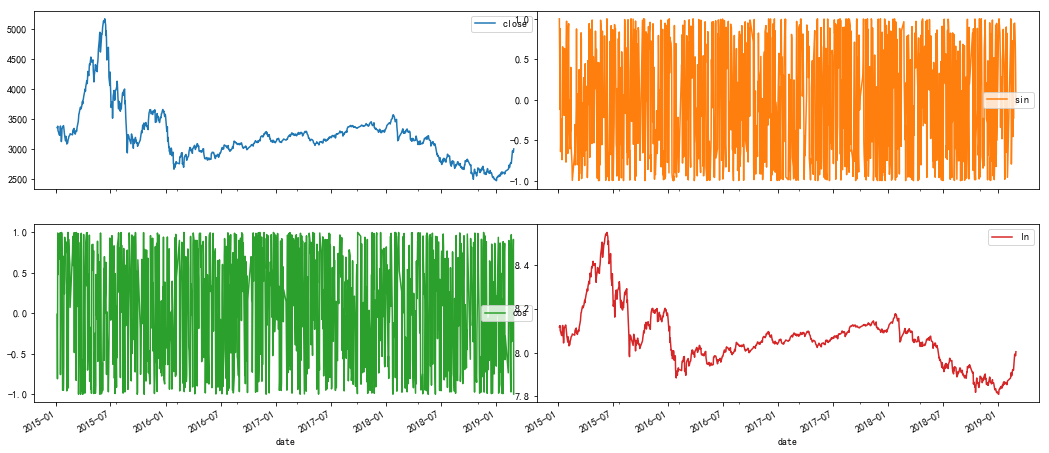

In [190]:
df=get_data('sh')[['open','close','high','low']]
df['sin']=ta.SIN(df.close)
df['cos']=ta.COS(df.close)
df['ln']=ta.LN(df.close)
#将上述函数计算得到的结果进行可视化
df[['close','sin','cos','ln']].plot(figsize=(18,8),
       subplots = True,layout=(2, 2))
plt.subplots_adjust(wspace=0,hspace=0.2)